In [1]:
import json
import copy
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras_tuner
from dataclasses import dataclass
from typing import List
from keras import layers, ops
from keras.utils import timeseries_dataset_from_array
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
%matplotlib inline

from processing import Stationarizer, Normalizer
from analysis import get_trials, get_RMSEs, make_histogram, plot_lrs, get_trials_df
from plotting import visualize_loss, show_plot
from model_builder import build_model, build_spec_model, get_tuner

2024-08-04 13:23:31.449620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
trials = get_trials(110, "stock_predictor_2024-08-04 12:16:06.946981")
trials = get_RMSEs(trials)

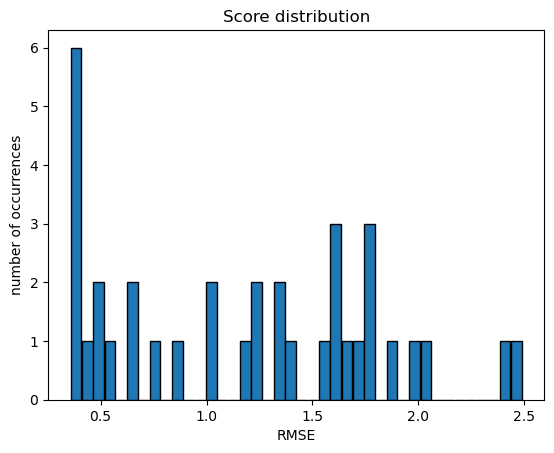

In [6]:
counts = make_histogram(trials, num_bins=40, width=0.05)

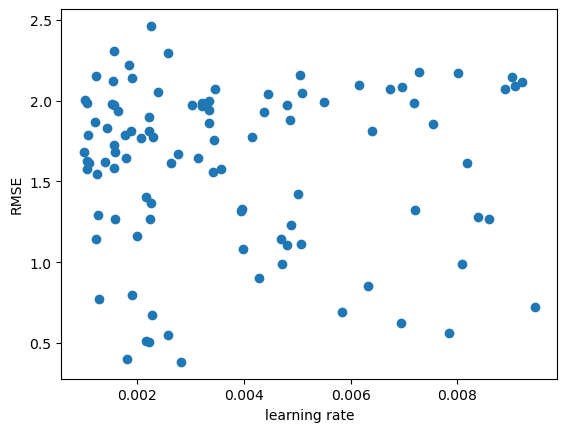

In [7]:
plot_lrs(trials)

In [8]:
df = get_trials_df(trials)
df

,dropout_0,kernel_initializer_0,dropout_1,kernel_initializer_1,kernel_initializer_2,lr,trial id,rmse,mse,best step,total dropout
0,0.4,glorot_uniform,0.2,glorot_uniform,glorot_uniform,0.002818,065,0.146995,0.021607,45,0.6
1,0.3,glorot_uniform,0.4,glorot_uniform,he_normal,0.001811,032,0.163536,0.026744,47,0.7
2,0.3,glorot_uniform,0.4,glorot_uniform,glorot_uniform,0.002228,019,0.254638,0.064840,48,0.7
3,0.3,glorot_uniform,0.2,glorot_uniform,he_normal,0.002172,073,0.261208,0.068230,49,0.5
4,0.3,glorot_uniform,0.4,glorot_uniform,glorot_uniform,0.002580,074,0.302061,0.091241,38,0.7
...,...,...,...,...,...,...,...,...,...,...,...
95,0.4,glorot_uniform,0.3,he_normal,glorot_uniform,0.007272,057,4.753053,22.591510,0,0.7
96,0.4,glorot_uniform,0.4,glorot_uniform,glorot_uniform,0.001838,063,4.924107,24.246826,2,0.8
97,0.2,glorot_uniform,0.3,he_normal,he_normal,0.002581,052,5.269351,27.766055,3,0.5
98,0.3,he_normal,0.3,he_normal,he_normal,0.001570,035,5.329645,28.405117,1,0.6
